## Load the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
heart = pd.read_csv('data/heart.csv')
heart.head(5)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp   
0   63    1   3     145   233    1        0       150     0      2.3    0  \
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [8]:
new_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart.columns = new_columns

# cp -> chest pain (type chest pain)
# trtbps -> resting blood pressure (in mmHg)
# chol -> Cholesterol (in mg/dl)
# fbs -> Fasting blood sugar > 120 mg/dl (1 = True 0 = False)
# rest_ecg -> resting electrocardiographic results
# thalach -> maximum heart rate
# exng -> exervise induced angina( 1 = Yes,  0 = No)
# oldpeak -> previous peak
# target -> predicted (dependent variable)

heart.head(4)

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope   
0   63    1   3     145   233    1         0      150      0      2.3      0  \
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1

In [9]:
heart.shape

(303, 14)

In [10]:
# get the Information about the datasets columns with get the sum of the coresponding columns None values.

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Preparation for Exploratory Data Analysis (EDA)

In [11]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
heart.describe()

age         sex          cp      trtbps        chol         fbs   
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  \
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

         rest_ecg     thalach       exang     oldpeak       slope          ca   
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  \
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

## Examine the Statistics of variables

In [13]:
# coulumn names devide into two of categroical variable and numerical variables

numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

heart[numeric_var].describe()

age      trtbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

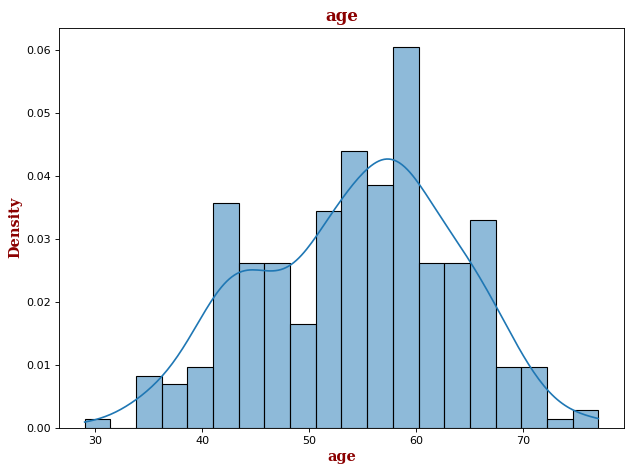

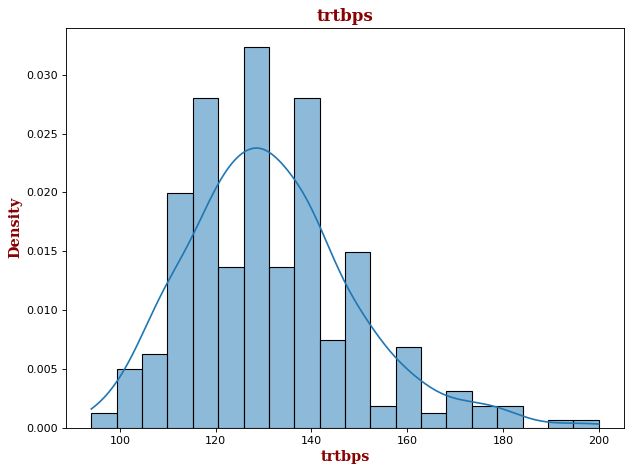

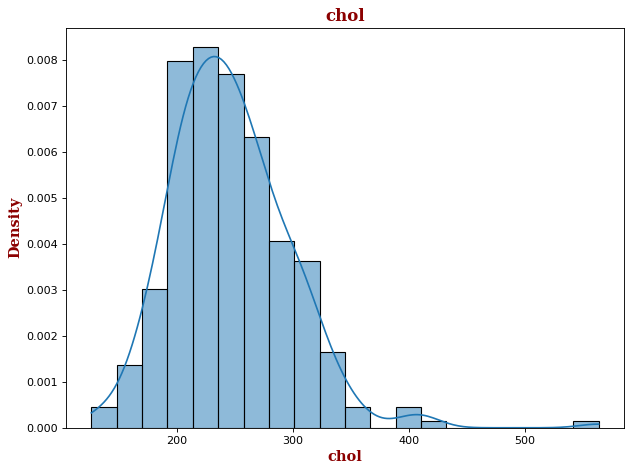

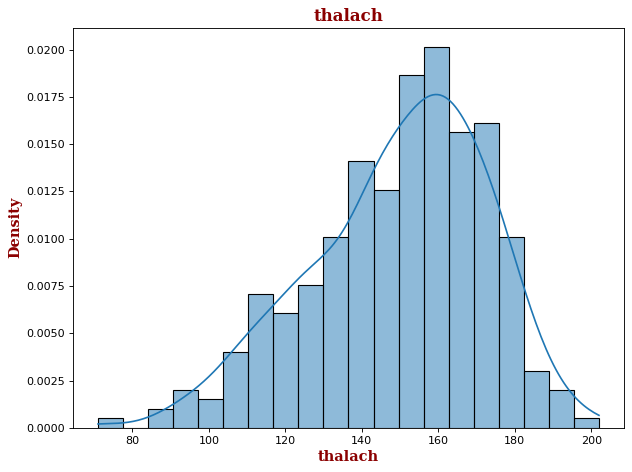

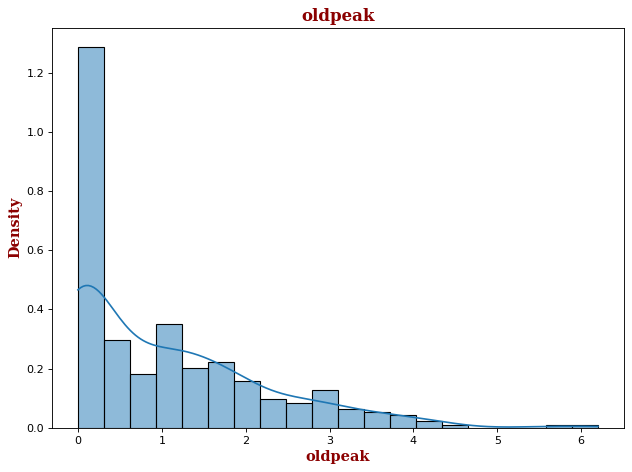

In [14]:
# Display all the column name vs Density

title_font = {'family':'serif', 'color':'darkred', 'weight' :'bold', 'size':15}
axis_font = {'family':'serif', 'color':'darkred', 'weight': 'bold', 'size':13}

for i in numeric_var:
  plt.figure(figsize = (8,6), dpi = 80) # dpi = dot per inches
  sns.histplot(heart[i], kde = True, stat = "density", bins = 20)

  plt.title(i, fontdict = title_font)
  plt.xlabel(i, fontdict = axis_font)
  plt.ylabel("Density", fontdict = axis_font)

  plt.tight_layout()
  plt.show()

In [15]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol" , \
                       "Maximum Heart Rate Achived", ]

list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achived')]

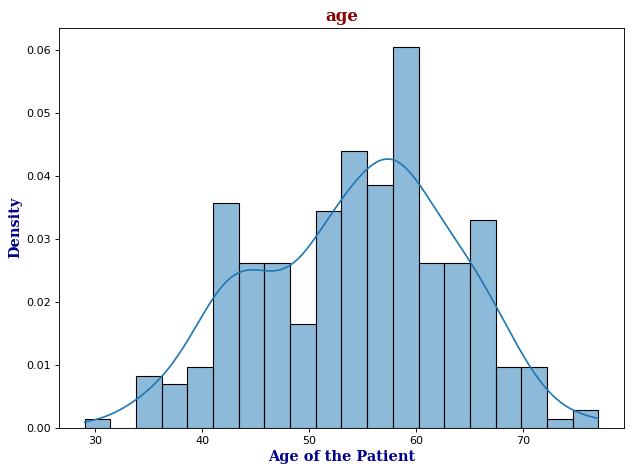

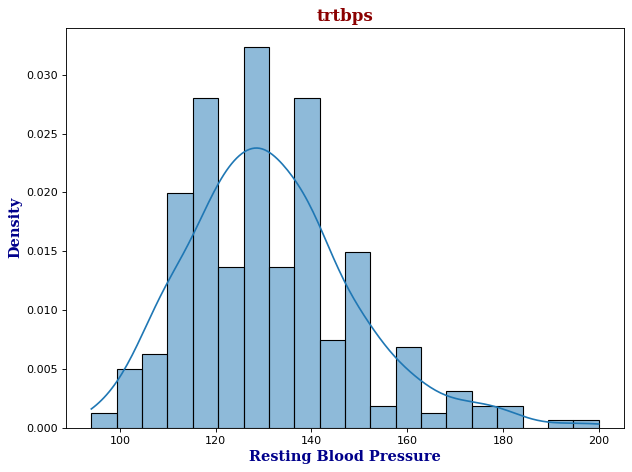

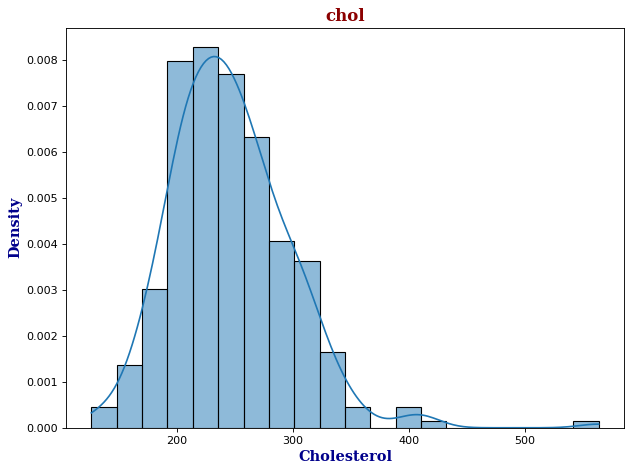

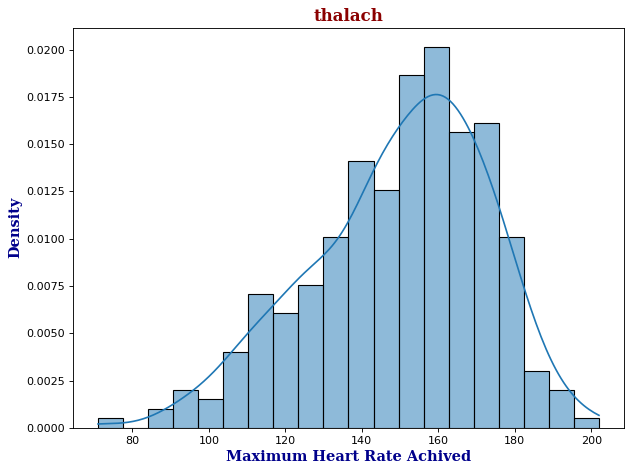

In [16]:
title_font = {'family':'serif', 'color':'darkred', 'weight' :'bold', 'size':15}
axis_font = {'family':'serif', 'color':'darkblue', 'weight': 'bold', 'size':13}

for i,z in list(zip(numeric_var, numeric_axis_name)):
  plt.figure(figsize = (8,6), dpi = 80) # dpi = dot per inches
  sns.histplot(heart[i], kde = True, stat = "density", bins = 20)

  plt.title(i, fontdict = title_font)
  plt.xlabel(z, fontdict = axis_font)
  plt.ylabel("Density", fontdict = axis_font)

  plt.tight_layout()
  plt.show()

In [17]:
heart['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [18]:
list(heart['cp'].value_counts())

[143, 87, 50, 23]

In [19]:
list(heart['cp'].value_counts().index)

[0, 2, 1, 3]

In [20]:
# Categorical Variables(Analsis with Distplot)

categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [21]:
categoric_axis_name = ['Gender', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting Electrocardiographic Results', \
                       'Exrcises Induced Angina', 'The Slope of ST Segment', 'The Slope of ST Segment', 'Number of Major Vessels', 'Thal', 'Target']
list(zip(categoric_var, categoric_axis_name))                       

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exrcises Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'The Slope of ST Segment'),
 ('thal', 'Number of Major Vessels'),
 ('target', 'Thal')]

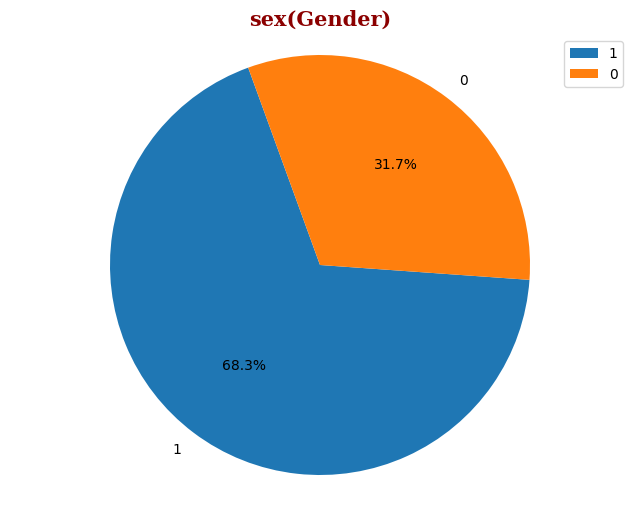

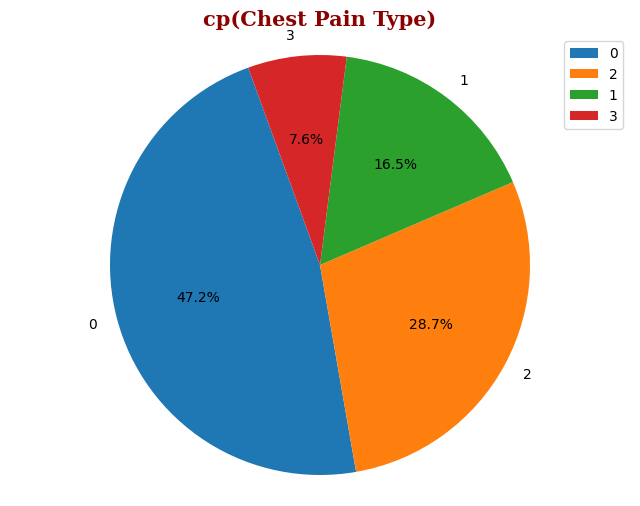

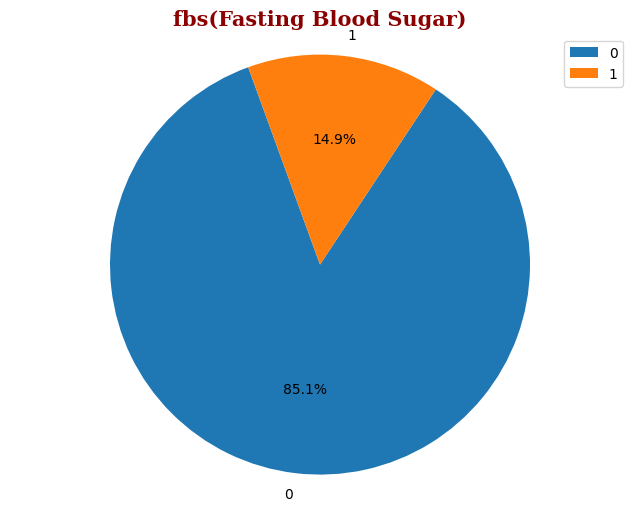

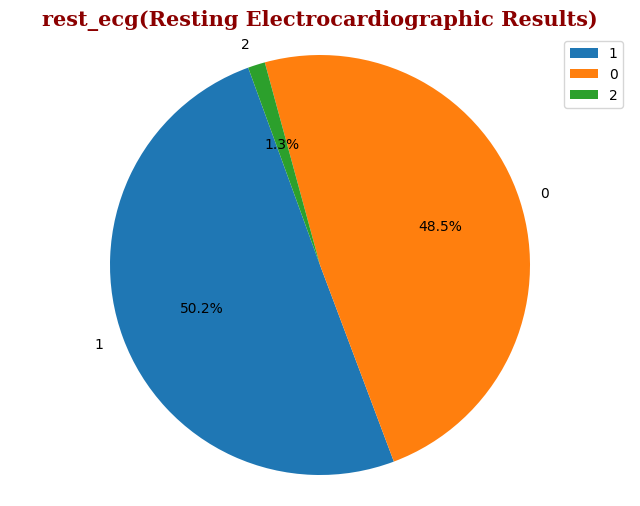

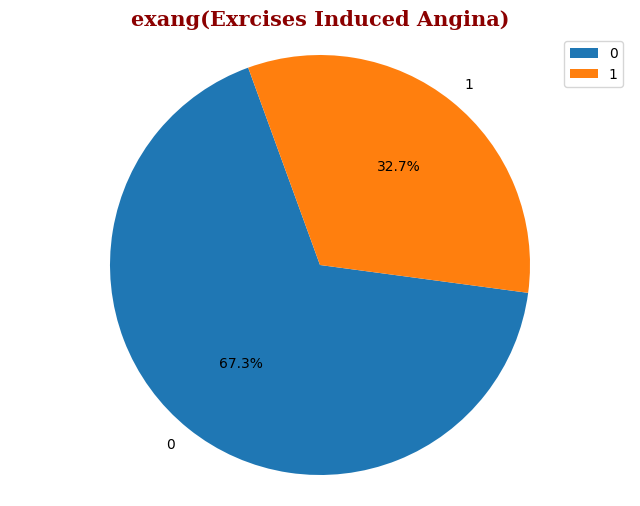

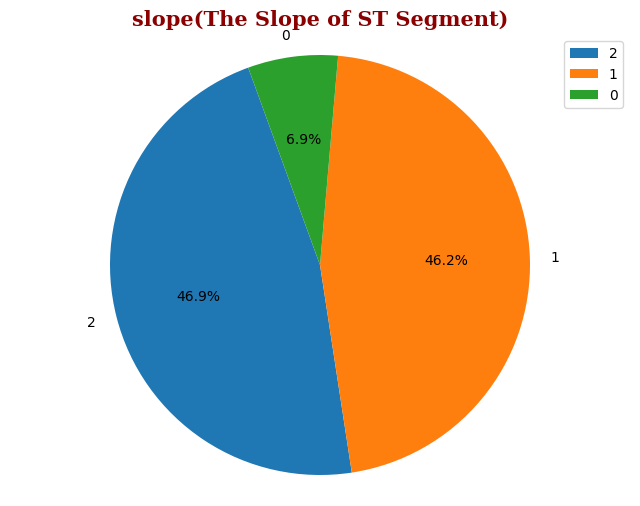

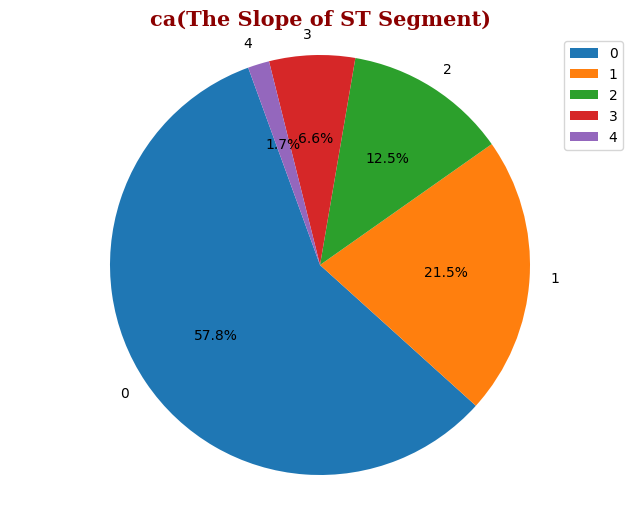

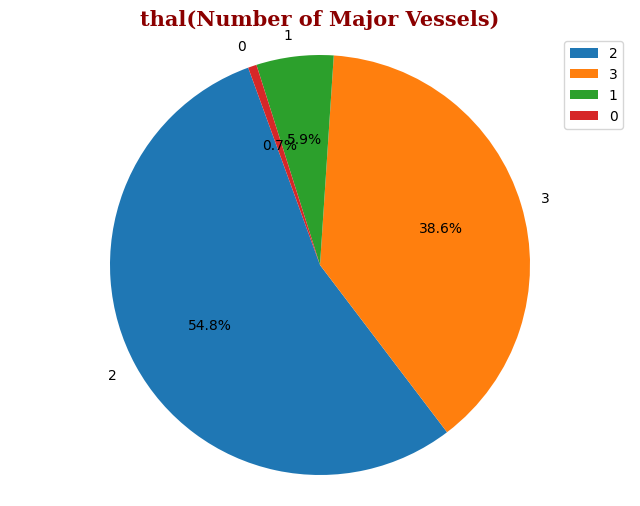

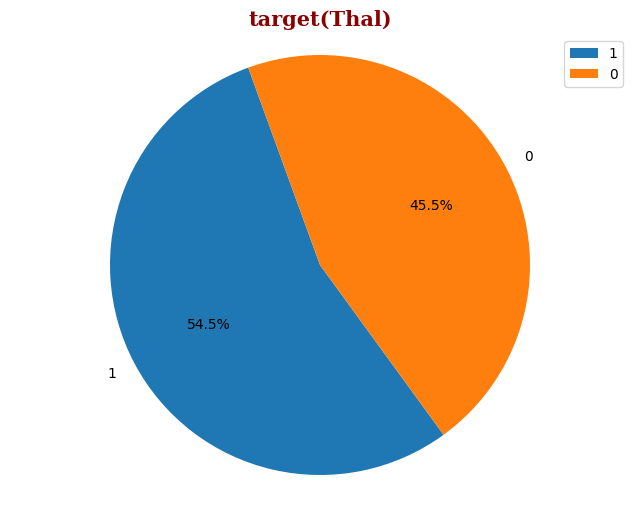

In [22]:
title_font = {'family':'serif', 'color':'darkred', 'weight' :'bold', 'size':15}
axis_font = {'family':'serif', 'color':'darkblue', 'weight': 'bold', 'size':13}

for i,z in list(zip(categoric_var, categoric_axis_name)):
  fig, ax = plt.subplots(figsize = (8,6))
  
  observation_values = list(heart[i].value_counts().index)
  total_observational_values = list(heart[i].value_counts()) 

  ax.pie(total_observational_values, labels = observation_values, autopct = "%1.1f%%", startangle = 110, labeldistance = 1.1)
  ax.axis("equal")

  plt.title((i+"("+z+")"), fontdict = title_font)
  plt.legend()
  plt.show()



In [23]:
# Examine the Missing data According to the Analysis Result

heart[heart['thal'] == 0]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak   
48    53    0   2     128   216    0         0      115      0      0.0  \
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
281      1   0     0       0

In [24]:
heart['thal'] = heart['thal'].replace(0,np.nan )

In [25]:
heart.loc[[48,281], :]  # [[rows], columns]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak   
48    53    0   2     128   216    0         0      115      0      0.0  \
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0   NaN       1  
281      1   0   NaN       0

In [26]:
# fill the missing values

isnull_number = []
for i in heart.columns:
  x = heart[i].isnull().sum()
  isnull_number.append(x)

pd.DataFrame(isnull_number, index = heart.columns, columns = ["Total Missing Value "])

Total Missing Value 
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         2
target                       0

In [27]:
heart["thal"].fillna(2, inplace = True)
heart['thal'] = pd.to_numeric(heart['thal'], downcast = "integer")

heart['thal'].value_counts()

thal
2    168
3    117
1     18
Name: count, dtype: int64

## Bi-variate Analysis

In [28]:
# Numerical Variables - Target Variable(Analysis with FaceGrid)

numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [29]:
numeric_var.append("target")

c:\Users\Afortunado\Desktop\Heart Attack Prediction &  analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Afortunado\Desktop\Heart Attack Prediction &  analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


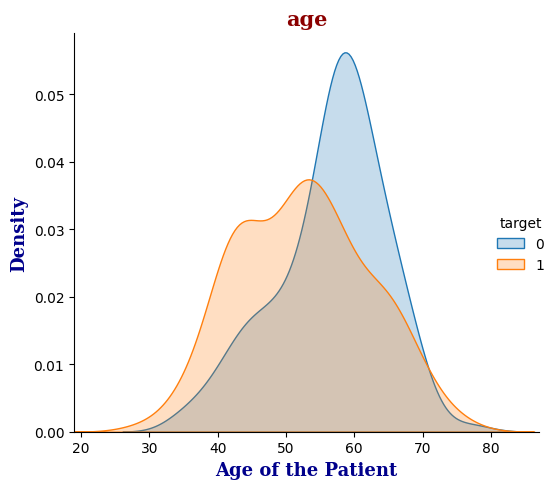

c:\Users\Afortunado\Desktop\Heart Attack Prediction &  analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Afortunado\Desktop\Heart Attack Prediction &  analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


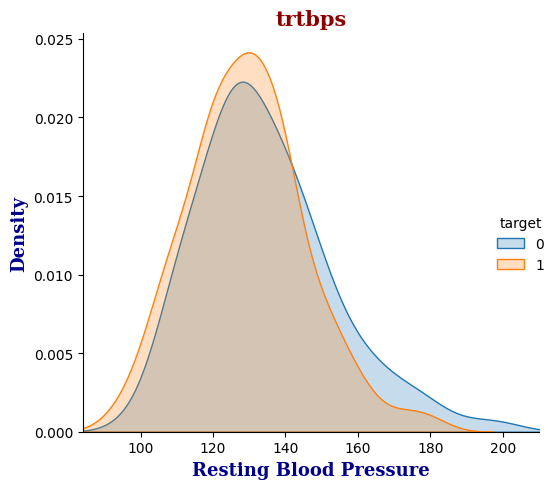

c:\Users\Afortunado\Desktop\Heart Attack Prediction &  analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Afortunado\Desktop\Heart Attack Prediction &  analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


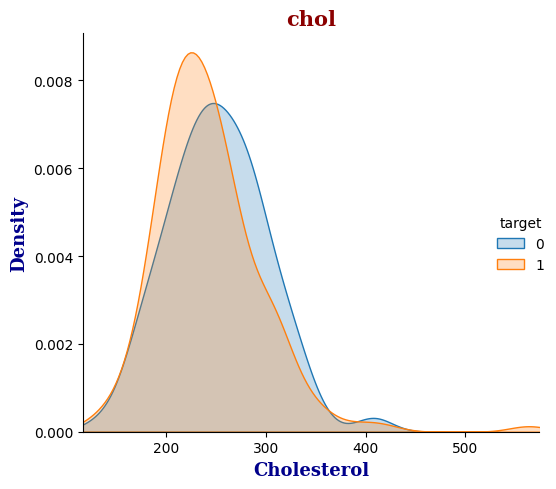

c:\Users\Afortunado\Desktop\Heart Attack Prediction &  analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Afortunado\Desktop\Heart Attack Prediction &  analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


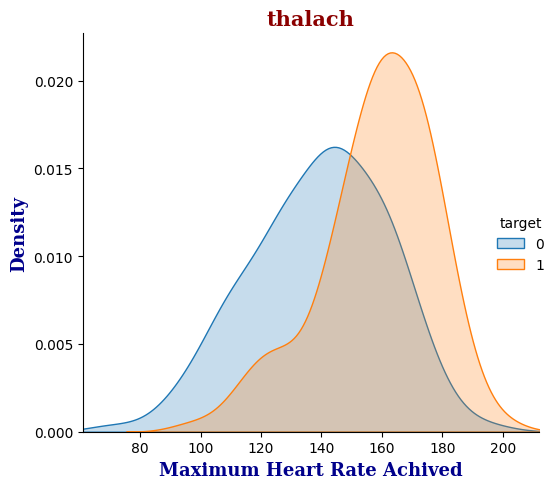

In [30]:
title_font = {'family':'serif', 'color':'darkred', 'weight' :'bold', 'size':15}
axis_font = {'family':'serif', 'color':'darkblue', 'weight': 'bold', 'size':13}

for i,z in list(zip(numeric_var, numeric_axis_name)):
  graph = sns.FacetGrid(heart[numeric_var], hue = "target", height = 5, xlim = ((heart[i].min()-10), (heart[i].max()+10)))
  graph.map(sns.kdeplot, i, shade = True)
  graph.add_legend()

  plt.title(i, fontdict = title_font)
  plt.xlabel(z, fontdict = axis_font)
  plt.ylabel("Density", fontdict = axis_font)

  plt.tight_layout()
  plt.show()

In [31]:
# analysig the graph

# if the bumps overlap too much , it means that the feature does not correlate well with the target variable
# because it target is equally common at these value of the feature

heart[numeric_var].corr()

age    trtbps      chol   thalach   oldpeak    target
age      1.000000  0.279351  0.213678 -0.398522  0.210013 -0.225439
trtbps   0.279351  1.000000  0.123174 -0.046698  0.193216 -0.144931
chol     0.213678  0.123174  1.000000 -0.009940  0.053952 -0.085239
thalach -0.398522 -0.046698 -0.009940  1.000000 -0.344187  0.421741
oldpeak  0.210013  0.193216  0.053952 -0.344187  1.000000 -0.430696
target  -0.225439 -0.144931 -0.085239  0.421741 -0.430696  1.000000

In [32]:
heart[numeric_var].corr().iloc[:,[-1]]

target
age     -0.225439
trtbps  -0.144931
chol    -0.085239
thalach  0.421741
oldpeak -0.430696
target   1.000000

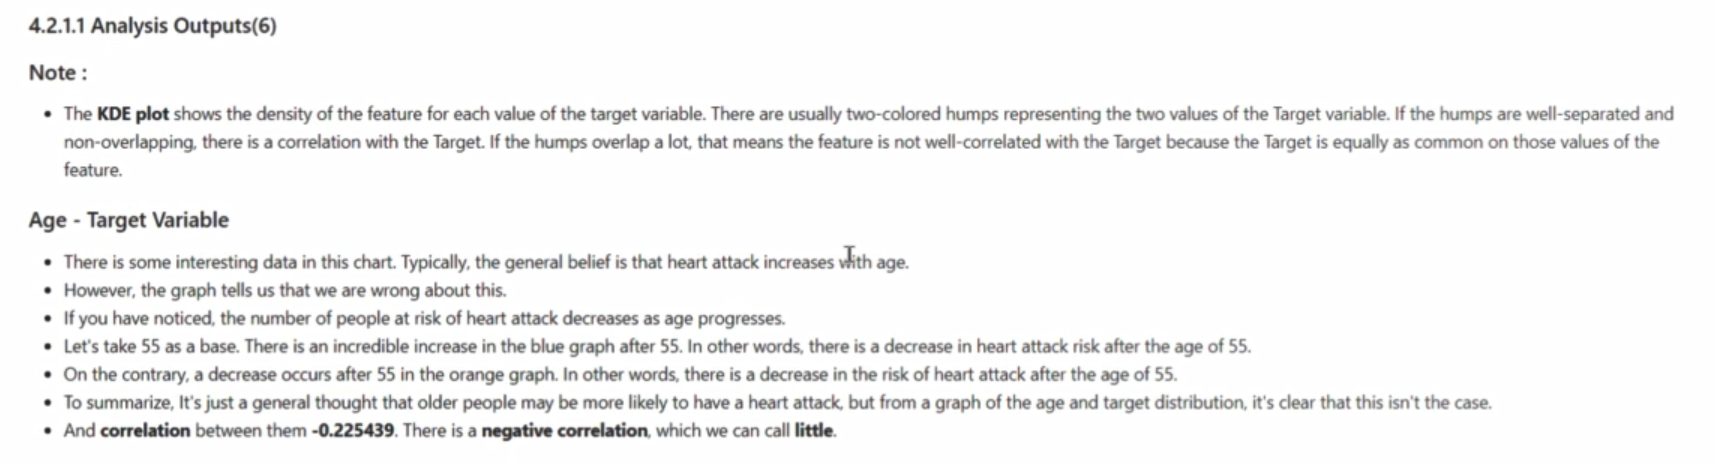

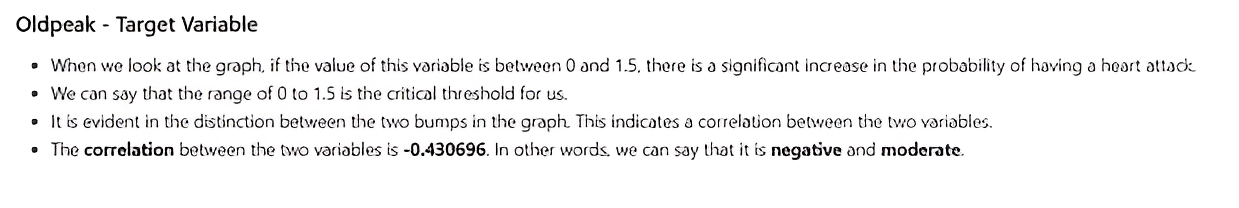

In [33]:
# Categorical Variables - Target Variable(Analysis with count plot)

# title_font = {'family':'serif', 'color':'darkred', 'weight' :'bold', 'size':15}
# axis_font = {'family':'serif', 'color':'darkblue', 'weight': 'bold', 'size':13}

# for i,z in list(zip(categoric_var, categoric_axis_name)):
#   # countplot
#   plt.figure(figsize = (8,5))
#   sns.countplot(i, data = heart[categoric_var], hue ="target")

#   plt.title(i +" - target", fontdict = title_font)
#   plt.xlabel(z, fontdict = axis_font)
#   plt.ylabel("Density", fontdict = axis_font)

#   plt.tight_layout()
#   plt.show()

In [34]:
heart[categoric_var].corr()

sex        cp       fbs  rest_ecg     exang     slope   
sex       1.000000 -0.049353  0.045032 -0.058196  0.141664 -0.030711  \
cp       -0.049353  1.000000  0.094444  0.044421 -0.394280  0.119717   
fbs       0.045032  0.094444  1.000000 -0.084189  0.025665 -0.059894   
rest_ecg -0.058196  0.044421 -0.084189  1.000000 -0.070733  0.093045   
exang     0.141664 -0.394280  0.025665 -0.070733  1.000000 -0.257748   
slope    -0.030711  0.119717 -0.059894  0.093045 -0.257748  1.000000   
ca        0.118261 -0.181053  0.137979 -0.072042  0.115739 -0.080155   
thal      0.211652 -0.169125 -0.011209 -0.013795  0.225508 -0.106310   
target   -0.280937  0.433798 -0.028046  0.137230 -0.436757  0.345877   

                ca      thal    target  
sex       0.118261  0.211652 -0.280937  
cp       -0.181053 -0.169125  0.433798  
fbs       0.137979 -0.011209 -0.028046  
rest_ecg -0.072042 -0.013795  0.137230  
exang     0.115739  0.225508 -0.436757  
slope    -0.080155 -0.106310  0.345877  
ca        1.000000  0.143248 -0.391724  
thal      0.143248  1.000000 -0.363322  
target   -0.391724 -0.363322  1.000000

In [35]:
heart[categoric_var].corr().iloc[:,[-1]]

target
sex      -0.280937
cp        0.433798
fbs      -0.028046
rest_ecg  0.137230
exang    -0.436757
slope     0.345877
ca       -0.391724
thal     -0.363322
target    1.000000

In [36]:
# Examin Numeric Variable Among Themseleves (Analysis with Pair Plot)

numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [37]:
numeric_var.remove("target")
heart[numeric_var].head()


age  trtbps  chol  thalach  oldpeak
0   63     145   233      150      2.3
1   37     130   250      187      3.5
2   41     130   204      172      1.4
3   56     120   236      178      0.8
4   57     120   354      163      0.6

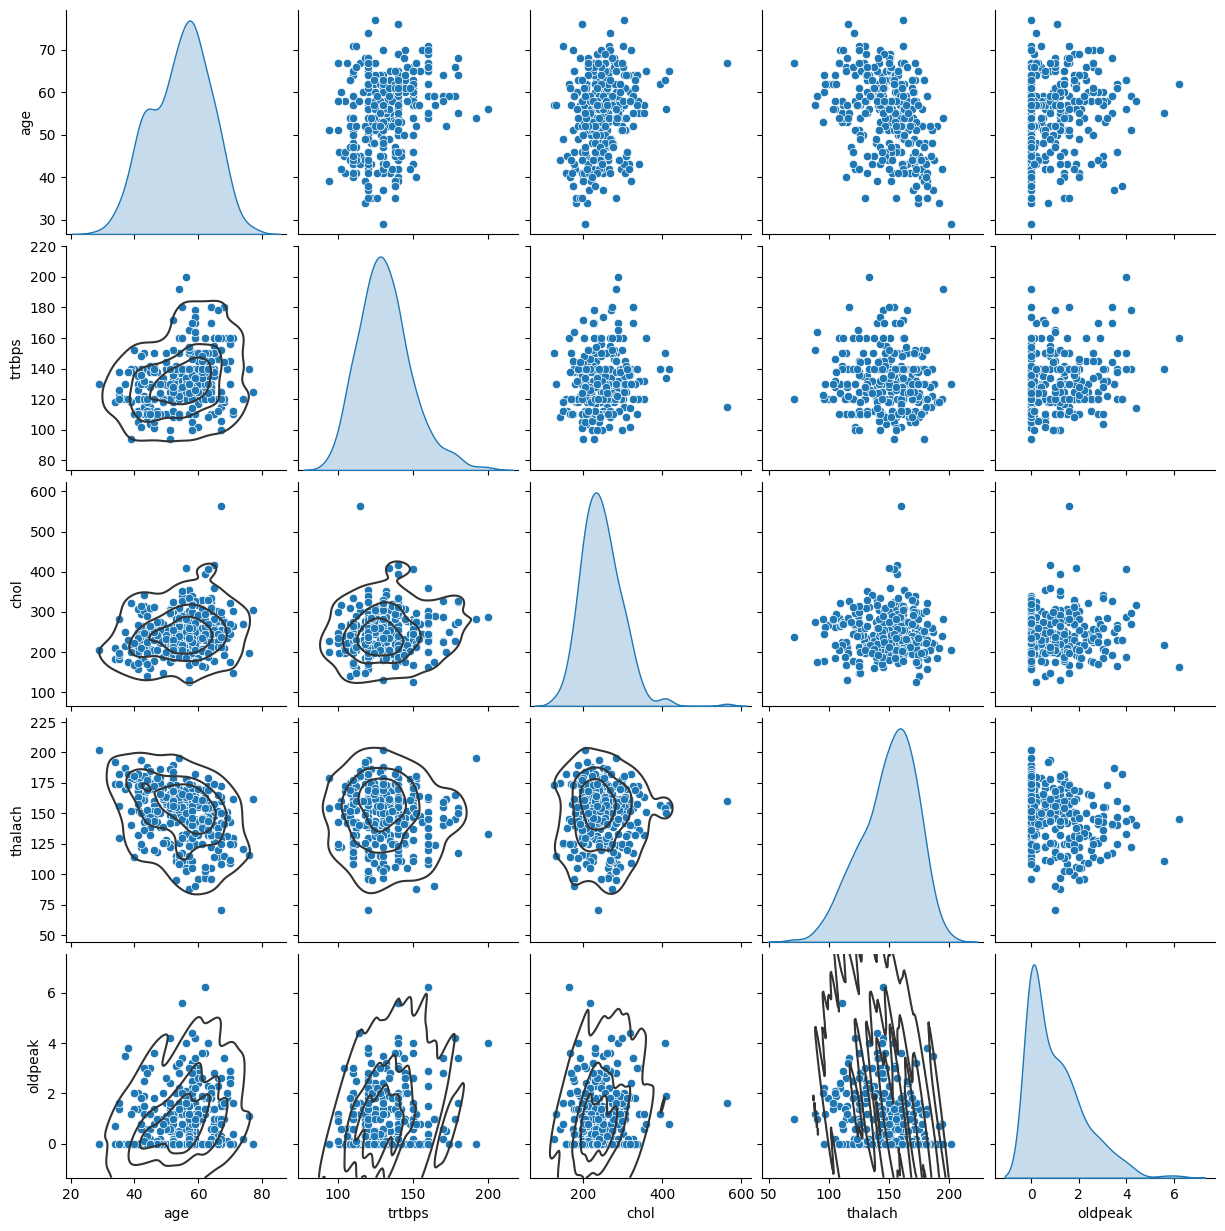

In [38]:
graph = sns.pairplot(heart[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4,color = '.2')
plt.show()

In [39]:
# Feature Scaling with the RobustScaler Method

from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
scaled_data = robust_scaler.fit_transform(heart[numeric_var])

In [ ]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [ ]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head(5)

age  trtbps      chol   thalach  oldpeak
0  0.592593    0.75 -0.110236 -0.092308   0.9375
1 -1.333333    0.00  0.157480  1.046154   1.6875
2 -1.037037    0.00 -0.566929  0.584615   0.3750
3  0.074074   -0.50 -0.062992  0.769231   0.0000
4  0.148148   -0.50  1.795276  0.307692  -0.1250

In [ ]:
# Creating a New DataFrame with the Melt() Function

df_new = pd.concat([df_scaled, heart.loc[:, "target"]], axis = 1)
df_new.head(5)

age  trtbps      chol   thalach  oldpeak  target
0  0.592593    0.75 -0.110236 -0.092308   0.9375       1
1 -1.333333    0.00  0.157480  1.046154   1.6875       1
2 -1.037037    0.00 -0.566929  0.584615   0.3750       1
3  0.074074   -0.50 -0.062992  0.769231   0.0000       1
4  0.148148   -0.50  1.795276  0.307692  -0.1250       1

In [ ]:
melted_data = pd.melt(df_new, id_vars = "target",var_name = "variables", value_name = "value" )
melted_data

target variables     value
0          1       age  0.592593
1          1       age -1.333333
2          1       age -1.037037
3          1       age  0.074074
4          1       age  0.148148
...      ...       ...       ...
1510       0   oldpeak -0.375000
1511       0   oldpeak  0.250000
1512       0   oldpeak  1.625000
1513       0   oldpeak  0.250000
1514       0   oldpeak -0.500000

[1515 rows x 3 columns]

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

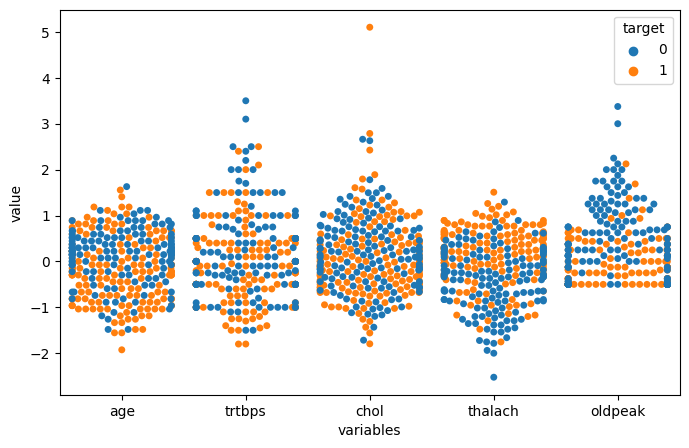

In [ ]:
plt.figure(figsize = (8,5))
sns.swarmplot(x = "variables", y = "value", hue = "target", data = melted_data )
plt.show()

In [ ]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

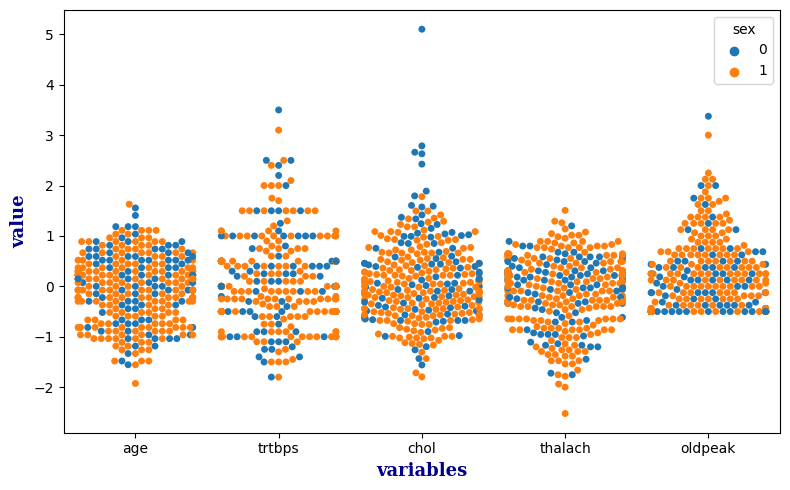

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

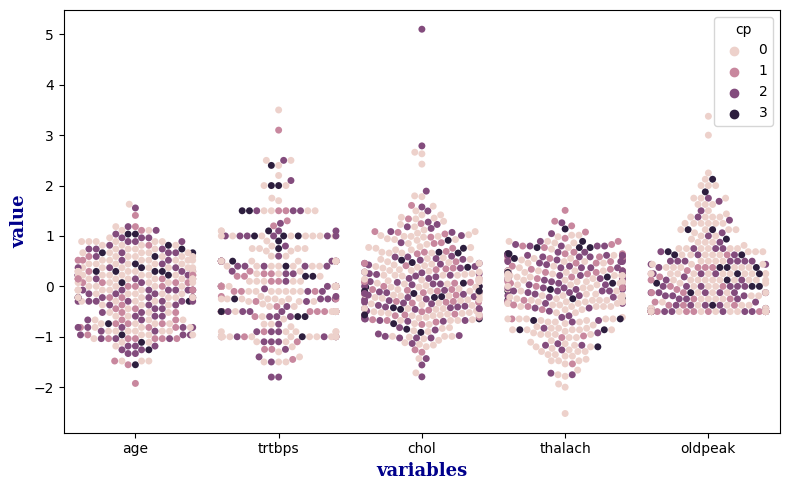

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

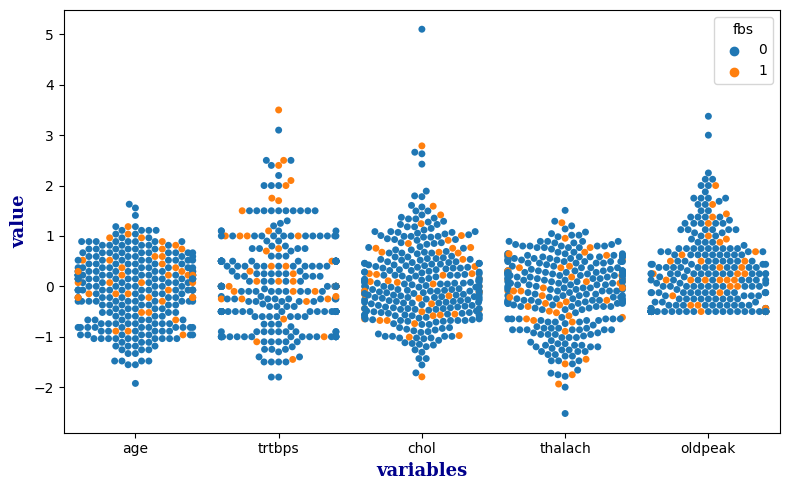

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

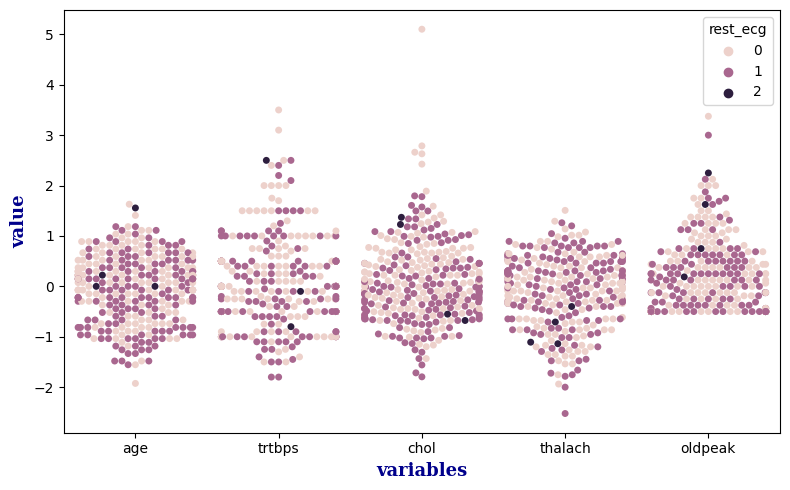

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

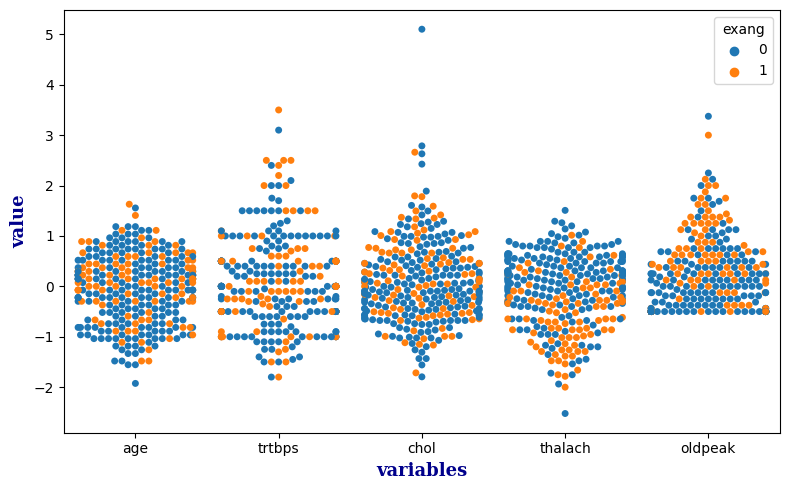

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

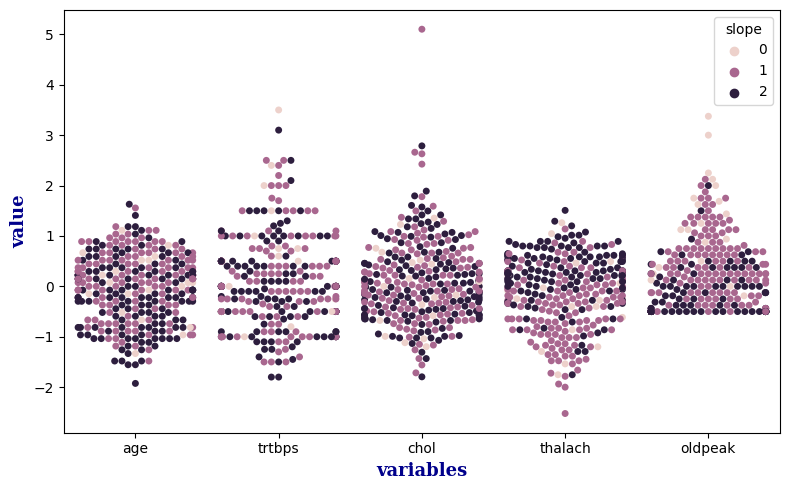

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

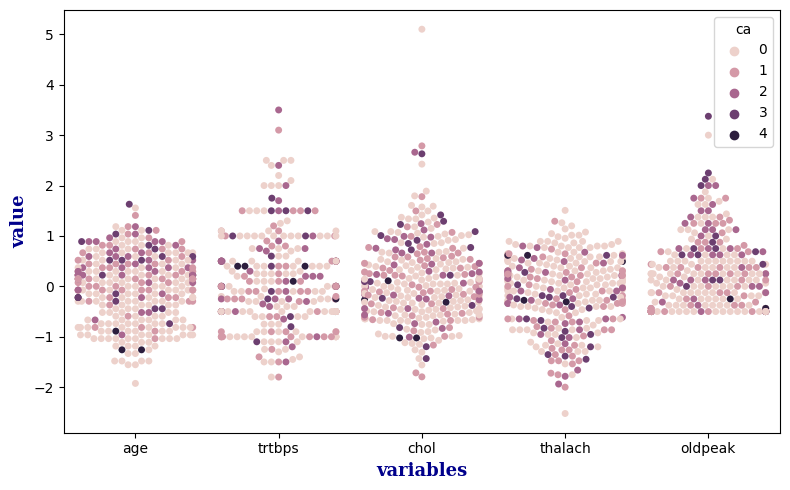

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

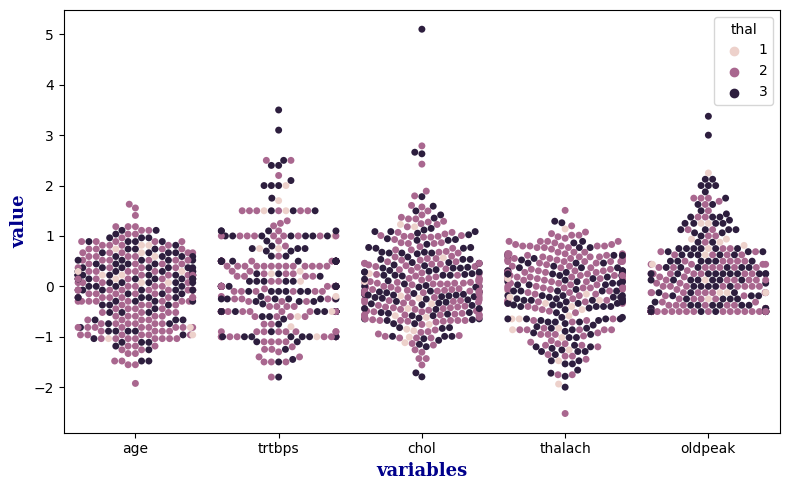

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

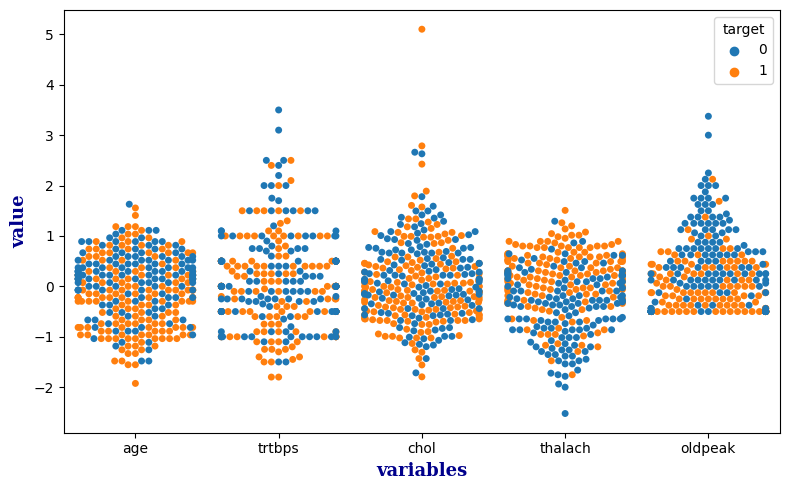

In [ ]:
# Numerical vairbles - Categorical Variables (Analysis with swarm plot)

for i in heart[categoric_var]:
  df_new = pd.concat([df_scaled, heart.loc[:,i]], axis = 1)
  melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value" )

  plt.figure(figsize = (8,5))
  sns.swarmplot(x = "variables", y = "value", hue= i, data = melted_data)

  plt.xlabel("variables", fontdict = axis_font)
  plt.ylabel("value", fontdict = axis_font)
  
  plt.tight_layout()
  plt.show( )

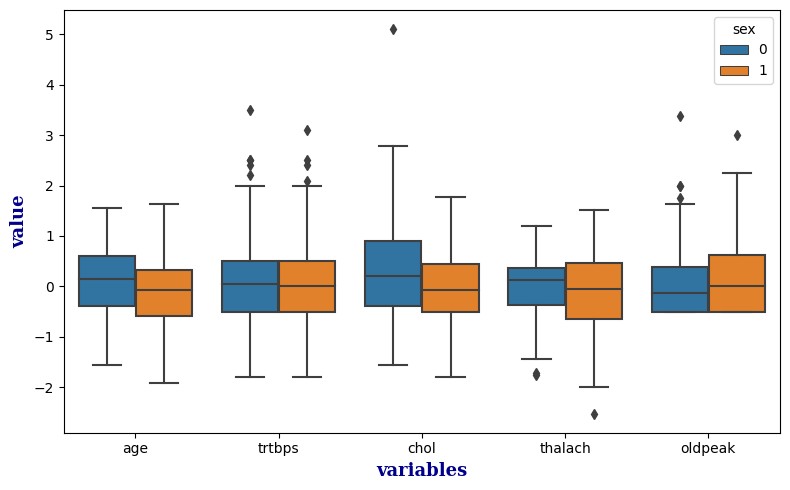

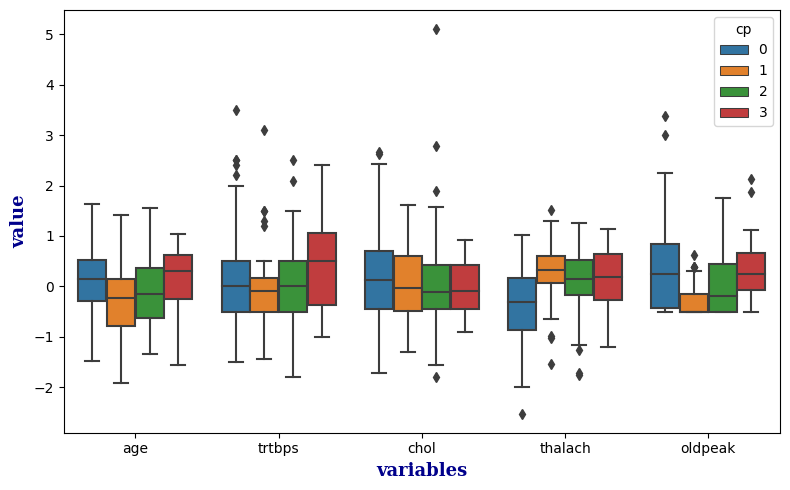

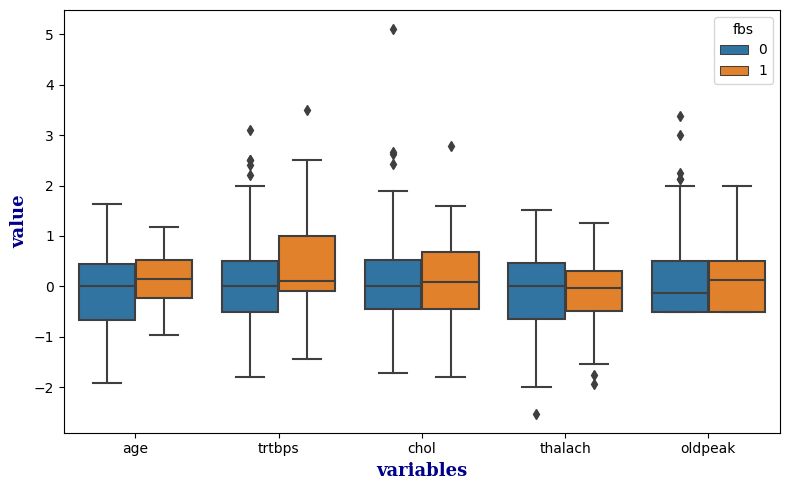

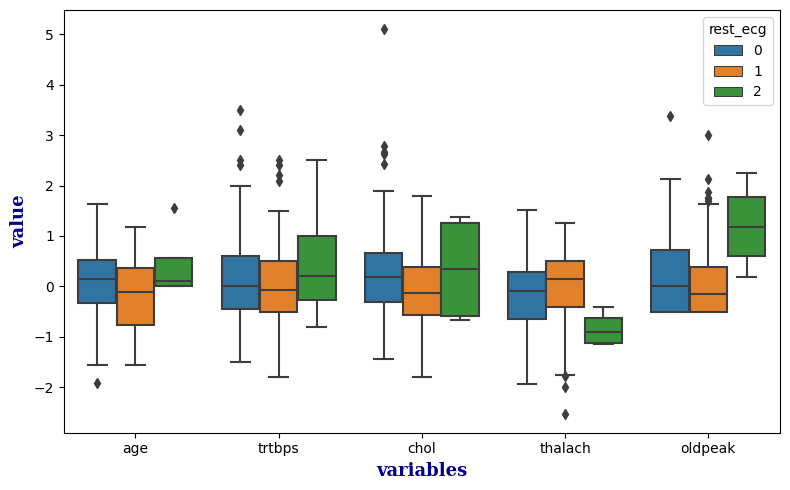

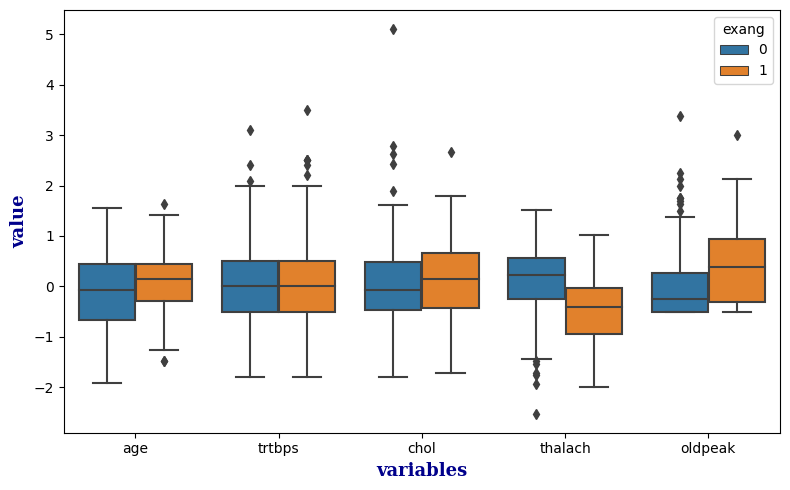

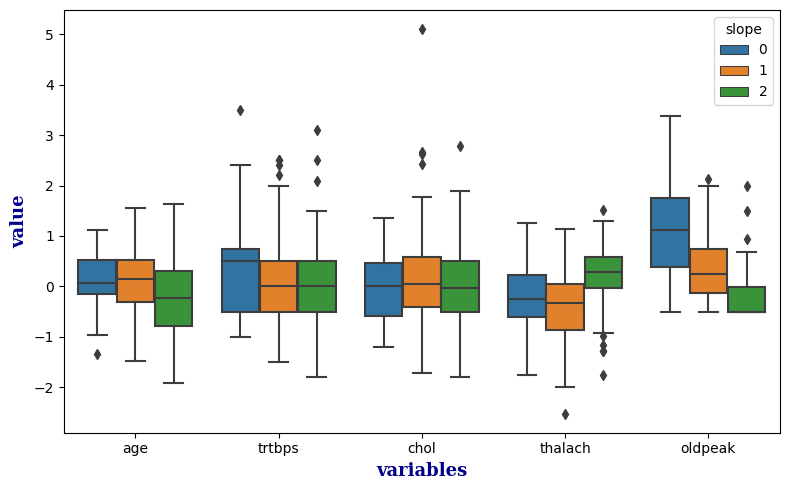

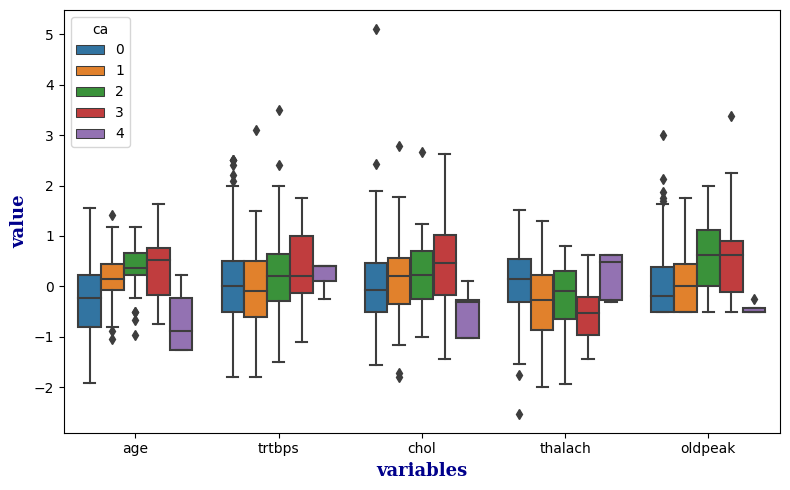

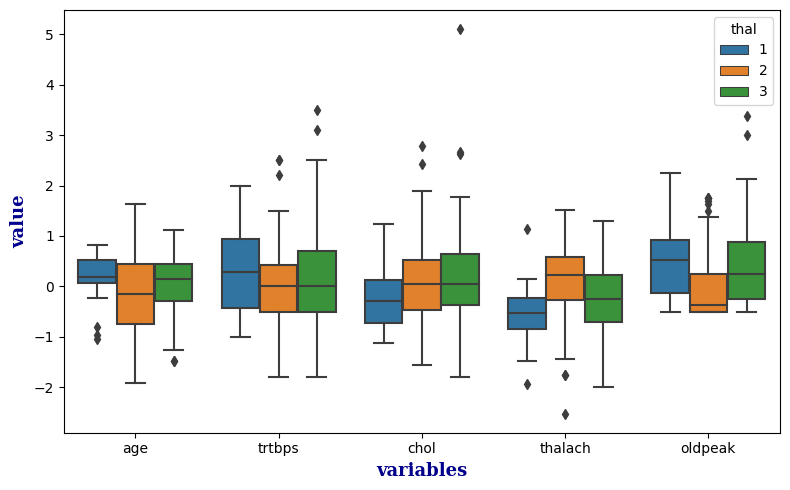

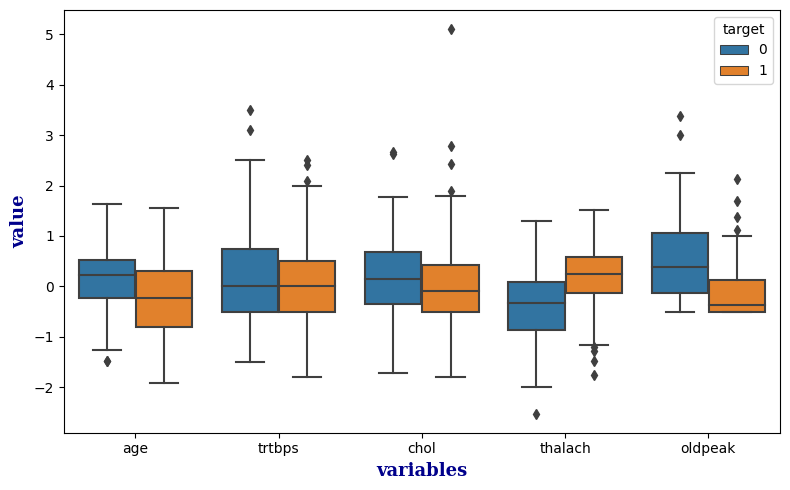

In [ ]:
# Numerical Variables - Categorical Variables (Analysis with Box Plot)

for i in heart[categoric_var]:
  df_new = pd.concat([df_scaled, heart.loc[:,i]], axis = 1)
  melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value" )

  plt.figure(figsize = (8,5))
  sns.boxplot(x = "variables", y = "value", hue= i, data = melted_data)

  plt.xlabel("variables", fontdict = axis_font)
  plt.ylabel("value", fontdict = axis_font)
  
  plt.tight_layout()
  plt.show( )   


In [ ]:
# Relationship between variables (Analysis with Heatmap)

df_scaled

age  trtbps      chol   thalach  oldpeak
0    0.592593    0.75 -0.110236 -0.092308   0.9375
1   -1.333333    0.00  0.157480  1.046154   1.6875
2   -1.037037    0.00 -0.566929  0.584615   0.3750
3    0.074074   -0.50 -0.062992  0.769231   0.0000
4    0.148148   -0.50  1.795276  0.307692  -0.1250
..        ...     ...       ...       ...      ...
298  0.148148    0.50  0.015748 -0.923077  -0.3750
299 -0.740741   -1.00  0.377953 -0.646154   0.2500
300  0.962963    0.70 -0.740157 -0.369231   1.6250
301  0.148148    0.00 -1.716535 -1.169231   0.2500
302  0.148148    0.00 -0.062992  0.646154  -0.5000

[303 rows x 5 columns]

In [ ]:
df_new2 = pd.concat([df_scaled, heart[categoric_var]], axis = 1)
df_new2

age  trtbps      chol   thalach  oldpeak  sex  cp  fbs  rest_ecg  \
0    0.592593    0.75 -0.110236 -0.092308   0.9375    1   3    1         0   
1   -1.333333    0.00  0.157480  1.046154   1.6875    1   2    0         1   
2   -1.037037    0.00 -0.566929  0.584615   0.3750    0   1    0         0   
3    0.074074   -0.50 -0.062992  0.769231   0.0000    1   1    0         1   
4    0.148148   -0.50  1.795276  0.307692  -0.1250    0   0    0         1   
..        ...     ...       ...       ...      ...  ...  ..  ...       ...   
298  0.148148    0.50  0.015748 -0.923077  -0.3750    0   0    0         1   
299 -0.740741   -1.00  0.377953 -0.646154   0.2500    1   3    0         1   
300  0.962963    0.70 -0.740157 -0.369231   1.6250    1   0    1         1   
301  0.148148    0.00 -1.716535 -1.169231   0.2500    1   0    0         1   
302  0.148148    0.00 -0.062992  0.646154  -0.5000    0   1    0         0   

     exang  slope  ca  thal  target  
0        0      0   0     1       1  
1        0      0   0     2       1  
2        0      2   0     2       1  
3        0      2   0     2       1  
4        1      2   0     2       1  
..     ...    ...  ..   ...     ...  
298      1      1   0     3       0  
299      0      1   0     3       0  
300      0      1   2     3       0  
301      1      1   1     3       0  
302      0      1   1     2       0  

[303 rows x 14 columns]

<AxesSubplot: >

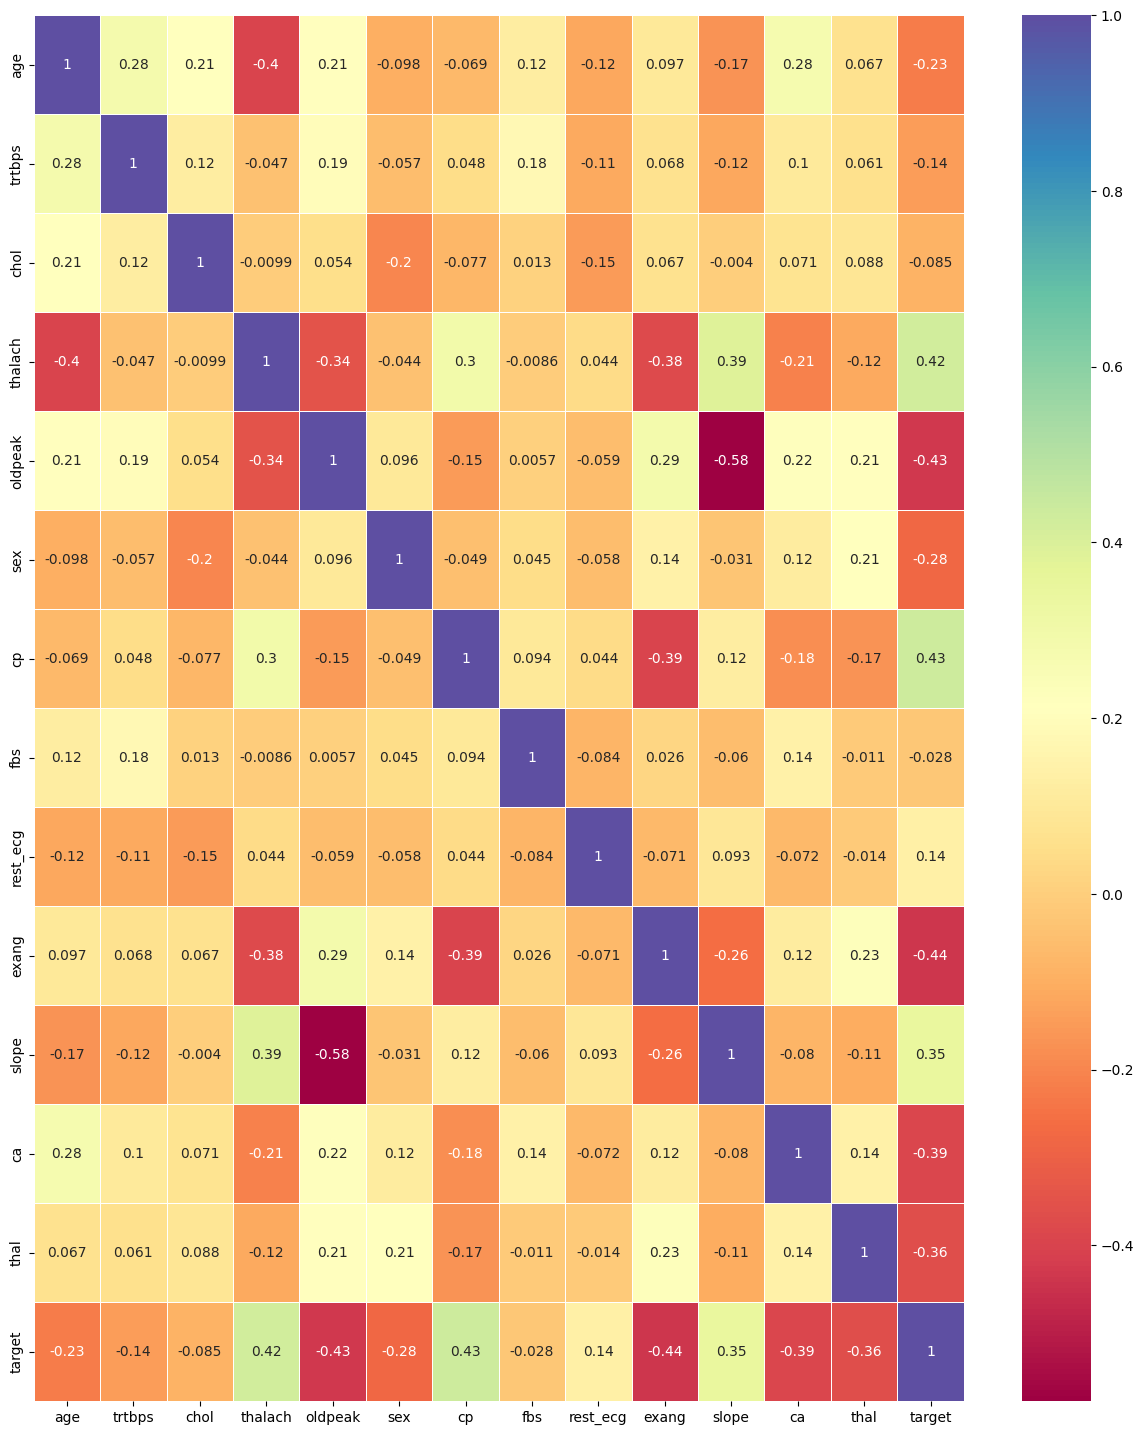

In [ ]:
plt.figure(figsize = (15,18))
sns.heatmap(data = df_new2.corr(), annot = True, cmap = "Spectral", linewidths = 0.5)

# 05. Preparation for Modeling

In [ ]:
# Dropping columns with low Correlation

heart.drop(["chol", "fbs"], axis = 1, inplace = True)

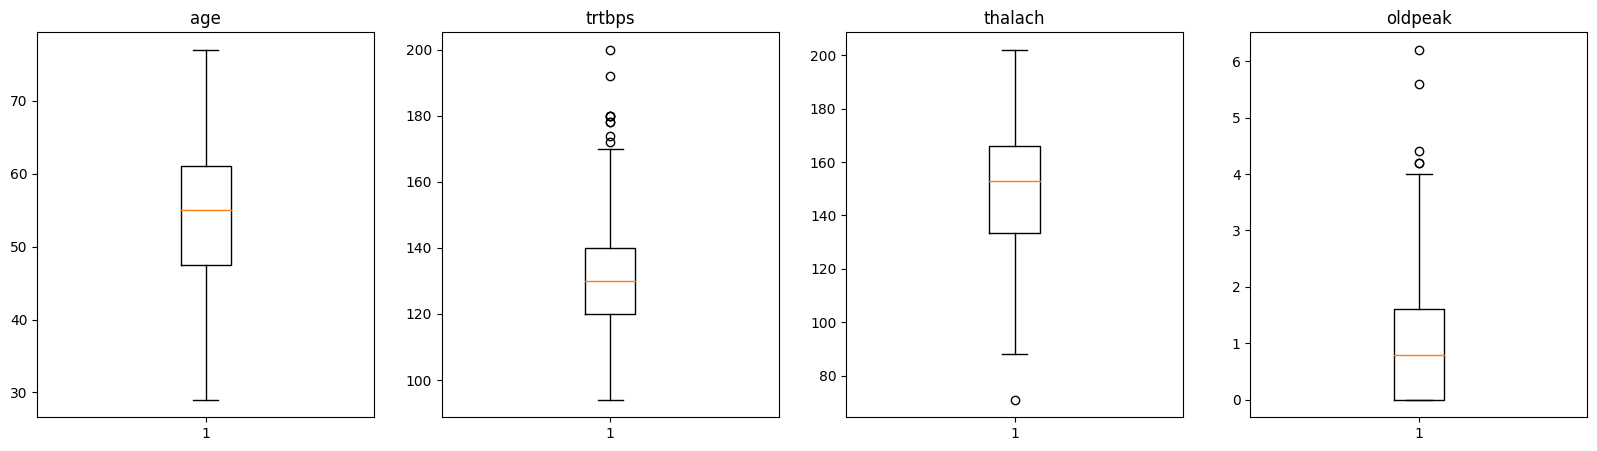

In [ ]:
# Remove the outliers
# vizualizing outliers

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize =(20,5))

ax1.boxplot(heart['age'])
ax1.set_title("age")

ax2.boxplot(heart['trtbps'])
ax2.set_title("trtbps")

ax3.boxplot(heart["thalach"])
ax3.set_title("thalach")

ax4.boxplot(heart['oldpeak'])
ax4.set_title("oldpeak")

plt.show()

In [ ]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [ ]:
z_score_trtbps = zscore(heart['trtbps'])

for threshold in range(1,4):
  print("Threshold Value : {}".format(threshold))
  print("Number of Outliers : {}".format(len(np.where(z_score_trtbps > threshold)[0])))
  print("----------------------")

Threshold Value : 1
Number of Outliers : 51
----------------------
Threshold Value : 2
Number of Outliers : 13
----------------------
Threshold Value : 3
Number of Outliers : 2
----------------------


In [ ]:
heart[z_score_trtbps > 2][["trtbps"]]

trtbps
8       172
101     178
110     180
152     170
195     170
203     180
223     200
228     170
241     174
248     192
260     178
266     180
292     170

In [ ]:
heart[z_score_trtbps > 2].trtbps.min()

170

In [ ]:
heart[heart['trtbps'] < 170].trtbps.max()

165

In [ ]:
winsorize_percentile_trtbps = (stats.percentileofscore(heart['trtbps'], 165))/100
print(winsorize_percentile_trtbps)

0.957095709570957


In [ ]:
1- winsorize_percentile_trtbps

0.04290429042904298

In [ ]:
trtbps_winsorize = winsorize(heart.trtbps, (0,(1- winsorize_percentile_trtbps)))
trtbps_winsorize

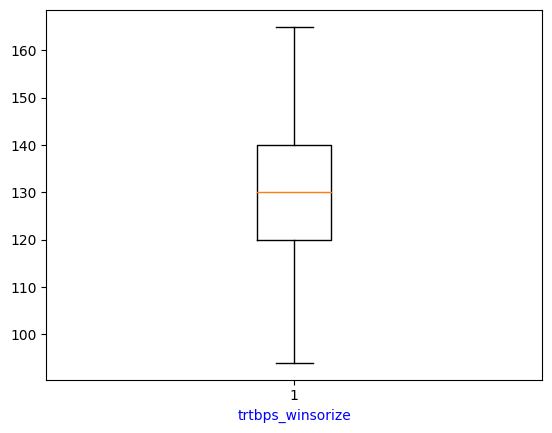

In [ ]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [ ]:
heart['trtbps_winsorize'] = trtbps_winsorize
heart.head()

In [ ]:
heart.shape

(303, 13)

In [ ]:
# Thalach Variable
 
def iqr(df,var):
  q1 = np.quantile(df[var], 0.25)
  q3 = np.quantile(df[var], 0.75)

  diff = q3-q1
  lower_v = q1 - (1.5*diff)
  upper_v = q3 + (1.5*diff)
  
  return df[(df[var] < lower_v) | (df[var] > upper_v)]


In [ ]:
thalach_out = iqr(heart, "thalach")
thalach_out

age  sex  cp  trtbps  rest_ecg  thalach  exang  oldpeak  slope  ca  thal  \
272   67    1   0     120         1       71      0      1.0      1   0     2   

     target  trtbps_winsorize  
272       0               120

In [ ]:
heart.drop([272], axis = 0, inplace = True)
heart.thalach[270:275]

{'whiskers': [<matplotlib.lines.Line2D at 0x209c121eb10>,
 'caps': [<matplotlib.lines.Line2D at 0x209c123de10>,
 'boxes': [<matplotlib.lines.Line2D at 0x209bf89e6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x209c123f390>],
 'fliers': [<matplotlib.lines.Line2D at 0x209c123fdd0>],
 'means': []}

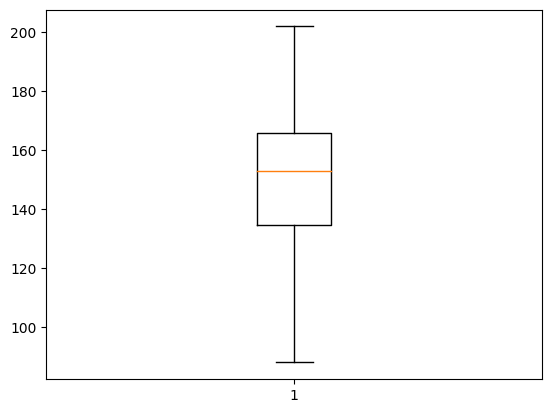

In [ ]:
plt.boxplot(heart['thalach'])

In [ ]:
# oldpeak variable

iqr(heart, "oldpeak")

age  sex  cp  trtbps  rest_ecg  thalach  exang  oldpeak  slope  ca  thal  \
101   59    1   3     178         0      145      0      4.2      0   0     3   
204   62    0   0     160         0      145      0      6.2      0   3     3   
221   55    1   0     140         1      111      1      5.6      0   0     3   
250   51    1   0     140         1      122      1      4.2      1   3     3   
291   58    1   0     114         2      140      0      4.4      0   3     1   

     target  trtbps_winsorize  
101       1               165  
204       0               160  
221       0               140  
250       0               140  
291       0               114

In [ ]:
heart[heart['oldpeak'] <4.2].oldpeak.max()

4.0

In [ ]:
winsorize_percentile_oldpeak = (stats.percentileofscore(heart['oldpeak'], 4)) /100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [ ]:
oldpeak_winsorize = winsorize(heart.oldpeak, (0, (1-winsorize_percentile_oldpeak)))

Text(0.5, 0, 'Oldpeak_winsorize')

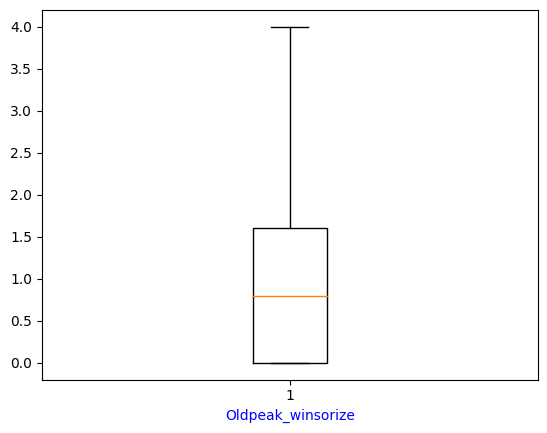

In [ ]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("Oldpeak_winsorize", color = "b")

In [ ]:
heart["oldpeak_winsorize"]  = oldpeak_winsorize
heart.head(10)

In [ ]:
heart.drop(['trtbps','oldpeak'], axis = 1, inplace = True)

Text(0.5, 1.0, 'oldpeak_winsorize')

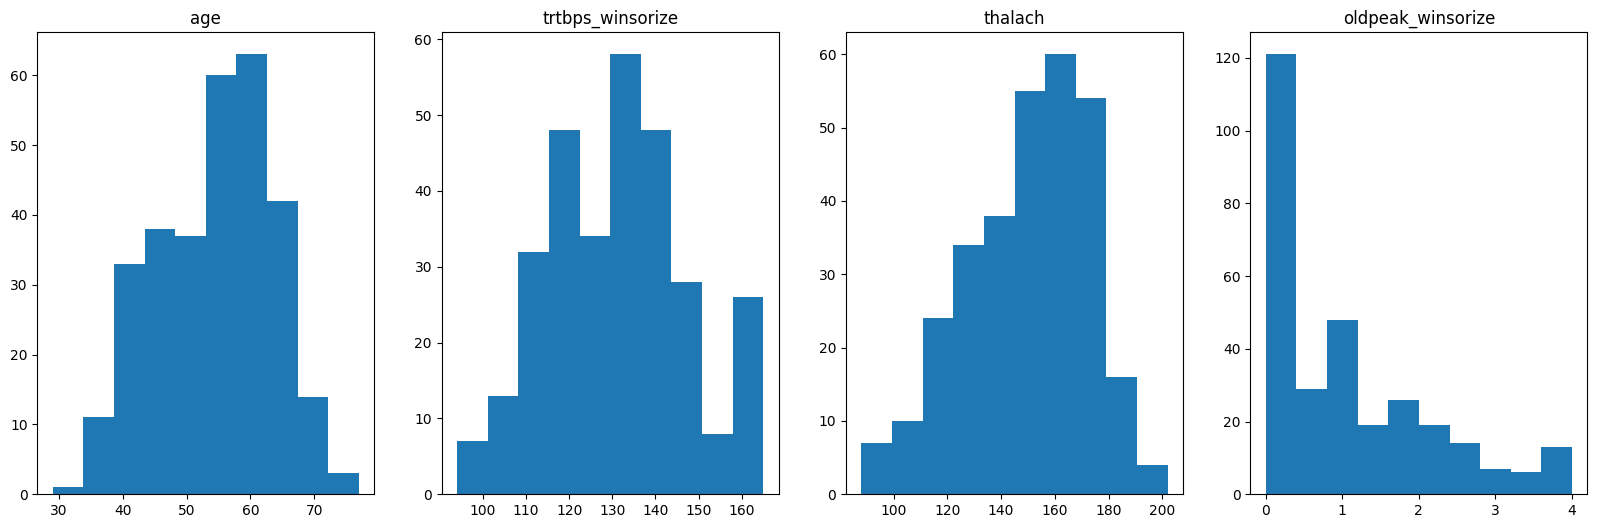

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = (20,6))

ax1.hist(heart["age"])
ax1.set_title("age")

ax2.hist(heart["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(heart["thalach"])
ax3.set_title("thalach")

ax4.hist(heart["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

In [ ]:
# no outliers above figure
# find out the skewtness about the data set

heart[['age', 'trtbps_winsorize', 'thalach', 'oldpeak_winsorize']].agg("skew").transpose()

age                 -0.199209
trtbps_winsorize     0.251969
thalach             -0.461611
oldpeak_winsorize    0.996036
dtype: float64

In [ ]:
# Transformation operation on Unsymmetrical data

heart["oldpeak_winorize_log"] = np.log(heart["oldpeak_winsorize"])
heart["oldpeak_winorize_sqrt"] = np.sqrt(heart["oldpeak_winsorize"])

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
heart.head(4)

age  sex  cp  rest_ecg  thalach  exang  slope  ca  thal  target  \
0   63    1   3         0      150      0      0   0     1       1   
1   37    1   2         1      187      0      0   0     2       1   
2   41    0   1         0      172      0      2   0     2       1   
3   56    1   1         1      178      0      2   0     2       1   

   trtbps_winsorize  oldpeak_winsorize  oldpeak_winorize_log  \
0               145                2.3              0.832909   
1               130                3.5              1.252763   
2               130                1.4              0.336472   
3               120                0.8             -0.223144   

   oldpeak_winorize_sqrt  
0               1.516575  
1               1.870829  
2               1.183216  
3               0.894427

In [ ]:
heart[["oldpeak_winsorize", "oldpeak_winorize_log", "oldpeak_winorize_sqrt"]].agg(['skew']).transpose()

skew
oldpeak_winsorize      0.996036
oldpeak_winorize_log        NaN
oldpeak_winorize_sqrt  0.108926

In [ ]:
# if skewness is 0.5 and -0.5 , it is highly normal distribution
# if skewnwss is -0.5 and -1.0 , it is moderately skewness
# if skewness is closer to 1.0 and -1.0 , it is highly skewness

heart.drop(['oldpeak_winsorize', 'oldpeak_winorize_log'], axis = 1, inplace = True)

Applying One Hot Encoding Method to Categorical Variables

In [ ]:
df_copy = heart.copy()
df_copy.head(5)

In [ ]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
categoric_var.remove("fbs")
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)
df_copy.head(5)

Feature Scaling with the RobustScaler Method for machine learing Algorithms


In [ ]:
new_numeric_var = ['age', 'thalach', 'trtbps_winsorize', 'oldpeak_winorize_sqrt']

In [ ]:
robust_scaler = RobustScaler()

df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])
df_copy.head(4)

Seperating Data into Test and Training Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_copy.drop(["target"], axis = 1)
y = df_copy[['target']]

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.1, random_state = 3)
print(f"x_train {x_train.shape[0]} ", f"y_train {y_train.shape[0]}", f"x_test {x_test.shape[0]}", f"y_test {y_test.shape[0]}", sep = "\n\n  ")

## Modeling

01) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_train, y_train)

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model {}".format(accuracy))

NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(log_reg, x_test, y_test, cv = 10)

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when

In [ ]:
print("Cross_validation Accuracy Score", score.mean())

Cross_validation Accuracy Score 0.8666666666666666


c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


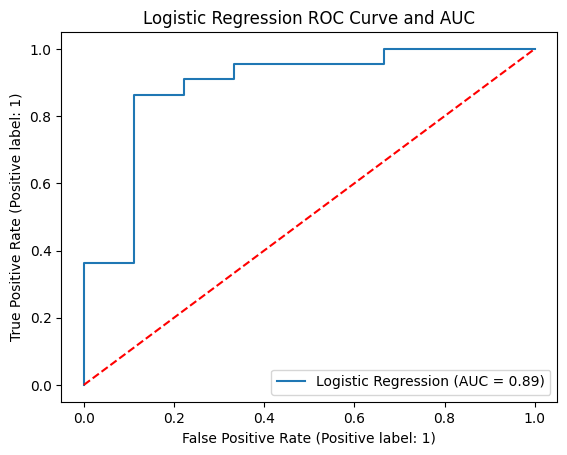

In [ ]:
# Roc Curve
from sklearn import metrics

metrics.plot_roc_curve(log_reg, x_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression ROC Curve and AUC")
plt.plot([0,1],[0,1],"r--")
plt.show()

## Hyperparameter Optimization (With GridSerchCv)

In [ ]:
from sklearn.model_selection import GridSearchCV

log_reg_new = LogisticRegression()
log_reg_new 

LogisticRegression()

In [ ]:
parameters = {"penalty" : ["l1", "l2"], "solver":['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']}
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)
log_reg_grid.fit(x_train, y_train)

In [ ]:
print("Best Parameters : ", log_reg_grid.best_params_)

Best Parameters :  {'penalty': 'l1', 'solver': 'saga'}


In [ ]:
log_reg_new2 = LogisticRegression(penalty='l1', solver = 'saga')
log_reg_new2 

LogisticRegression(penalty='l1', solver='saga')

In [ ]:
log_reg_new2.fit(x_train, y_train)

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='l1', solver='saga')

In [ ]:
y_pred = log_reg_new2.predict(x_test)
# print the accuracy score of the logistic Regression after hyper parameter tuning is
accuracy_score(y_test, y_pred)

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


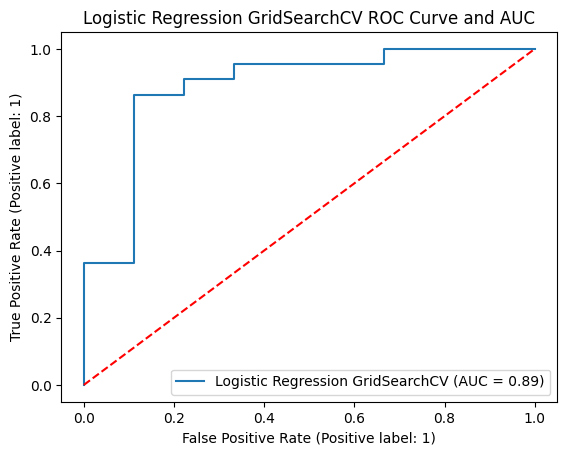

In [ ]:
metrics.plot_roc_curve(log_reg, x_test, y_test, name = "Logistic Regression GridSearchCV")
plt.title("Logistic Regression GridSearchCV ROC Curve and AUC")
plt.plot([0,1],[0,1],"r--")
plt.show()

## Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree = DecisionTreeClassifier(random_state = 5)
dec_tree.fit(x_train, y_train)

In [ ]:
y_pred = dec_tree.predict(x_test)
print("The accuracy score of Decision Tree is {}:".format(accuracy_score(y_test , y_pred)))

The accuracy score of Decision Tree is 0.7741935483870968:


In [ ]:
scores = cross_val_score(dec_tree, x_train, y_train, cv = 10)
print("Cross validation Accuracy score {} :".format(score.mean()))

Cross validation Accuracy score 0.8666666666666666 :


c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


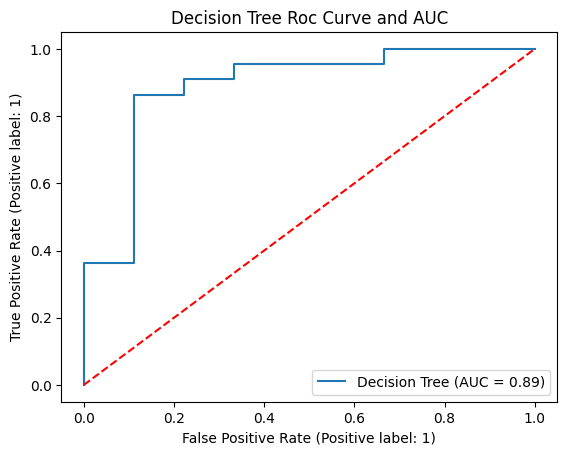

In [ ]:
metrics.plot_roc_curve(log_reg, x_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve and AUC")
plt.plot([0,1],[0,1],"r--")
plt.show()

### Support vector machine algorithm

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(random_state = 5)
svc_model.fit(x_train, y_train )

In [ ]:
y_pred = svc_model.predict(x_test)
print("The accuracy scrore of the Support vactor machine :{}".format(accuracy_score(y_test, y_pred)))

The accuracy scrore of the Support vactor machine :0.9032258064516129


In [ ]:
scores = cross_val_score(svc_model, x_train, y_train, cv = 10)
print("Cross validation accuracy Score {}".format(scores.mean()))

Cross validation accuracy Score 0.8116402116402117


c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\valid

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


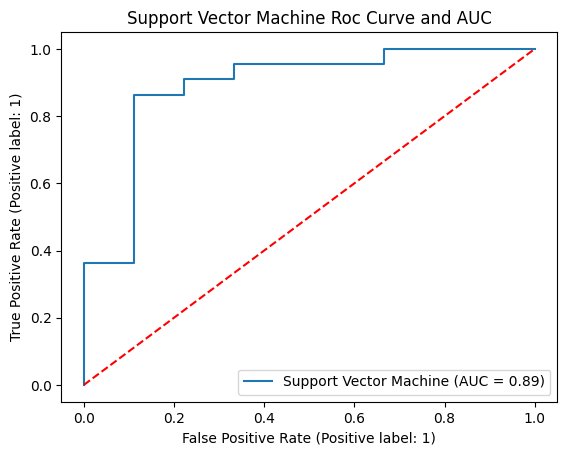

In [ ]:
metrics.plot_roc_curve(log_reg, x_test, y_test, name = "Support Vector Machine")
plt.title("Support Vector Machine Roc Curve and AUC")
plt.plot([0,1],[0,1],"r--")
plt.show()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
random_forest  = RandomForestClassifier(random_state = 5)
random_forest.fit(x_train, y_train)

C:\Users\Afortunado\AppData\Local\Temp\ipykernel_5500\1558657031.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


RandomForestClassifier(random_state=5)

In [ ]:
y_pred = random_forest.predict(x_test)
print("The test accuracy score of Random Forest is {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Random Forest is 0.8709677419354839


In [ ]:
scores = cross_val_score(random_forest, x_test, y_test, cv = 10 )

c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686

In [ ]:
print("Cross validation Accruacy Score {}".format(scores.mean()))

Cross validation Accruacy Score 0.8666666666666666


c:\Users\Afortunado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


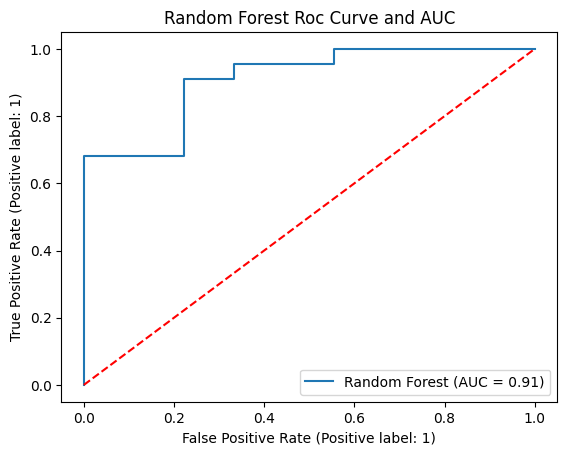

In [ ]:
metrics.plot_roc_curve(random_forest, x_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve and AUC")
plt.plot([0,1],[0,1],"r--")
plt.show()

In [ ]:
# if cros validation gives values is higher than the single x_train and y_train acccuracy 
# this mean the model is underfitting . to avoid the underfitting use hyperparamet tuning method.

### Hyperparameter Optimization(with GridSearchCV)

In [ ]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [ ]:
parameters = {"n_estimators":[50,100,150,200],
              "criterion":['gini', 'entropy'],
              "max_features" : ['auto', 'sqrt', 'log2'], 
              "bootstrap": [True, False]}

In [ ]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)
random_forest_grid.fit(x_train, y_train)

In [ ]:
print("Best Parameters :", random_forest_grid.best_params_)

Best Parameters : {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 150}


In [ ]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "auto", n_estimators = 200, random_state = 5)
random_forest_new2.fit(x_train, y_train)

In [ ]:
y_pred = random_forest_new2.predict(x_test)
print("The test Accuracy of the random forest classifeir after hyperparamete tuning {}".format(accuracy_score(y_test,y_pred)))

The test Accuracy of the random forest classifeir after hyperparamete tuning 0.8709677419354839
